## Clustering

In [ ]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
from sklearn import preprocessing
from sklearn.preprocessing import StandardScaler
from sklearn.cluster import KMeans, AgglomerativeClustering, DBSCAN
from sklearn.metrics.pairwise import euclidean_distances

%matplotlib inline

In [ ]:
df = pd.read_csv('Customer.csv' , index_col= False)

df.head()

,CustomerID,Gender,Age,Annual Income (k$),Spending Score (1-100)
0,1,Male,19,15,39
1,2,Male,21,15,81
2,3,Female,20,16,6
3,4,Female,23,16,77
4,5,Female,31,17,40


طبق مشخصات جدول هیچ داده ی N/A در جدول نیست.

In [ ]:
print(df.shape)
df.info()
df.notna().sum()
df.columns

(200, 5)
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 200 entries, 0 to 199
Data columns (total 5 columns):
 #   Column                  Non-Null Count  Dtype 
---  ------                  --------------  ----- 
 0   CustomerID              200 non-null    int64 
 1   Gender                  200 non-null    object
 2   Age                     200 non-null    int64 
 3   Annual Income (k$)      200 non-null    int64 
 4   Spending Score (1-100)  200 non-null    int64 
dtypes: int64(4), object(1)
memory usage: 7.9+ KB


Index(['CustomerID', 'Gender', 'Age', 'Annual Income (k$)',
       'Spending Score (1-100)'],
      dtype='object')

# پیش پردازش داده

### تبدیل جدول pandas به ماتریس داده numpy

In [ ]:
X = np.asanyarray(df[[ 'Age', 'Annual Income (k$)', 'Spending Score (1-100)']])


X[:5]

array([[19, 15, 39],
       [21, 15, 81],
       [20, 16,  6],
       [23, 16, 77],
       [31, 17, 40]], dtype=int64)

## استاندارد سازی داده

In [ ]:
X = preprocessing.MinMaxScaler().fit_transform(X)
X[:5]

array([[0.01923077, 0.        , 0.3877551 ],
       [0.05769231, 0.        , 0.81632653],
       [0.03846154, 0.00819672, 0.05102041],
       [0.09615385, 0.00819672, 0.7755102 ],
       [0.25      , 0.01639344, 0.39795918]])

C:\Users\AMIRHU~1\AppData\Local\Temp/ipykernel_9424/750707918.py:1: UserWarning: marker is redundantly defined by the 'marker' keyword argument and the fmt string "o" (-> marker='o'). The keyword argument will take precedence.
  plt.plot(X , 'o', marker = '.')


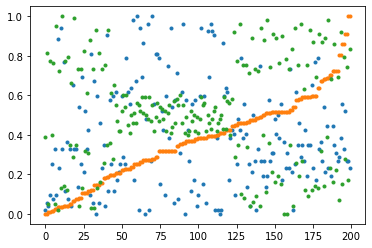

In [ ]:

plt.plot(X , 'o', marker = '.')
plt.show()

<center>
    <h1>
      مدل سازی  
    </h1>
    </center>
    

# مدل اول
## K-means

In [ ]:
kx = X.copy()
k_means = KMeans(init = "k-means++", n_clusters = 3, n_init = 20)
k_means.fit(kx)
labels = k_means.labels_
center = k_means.cluster_centers_


## اضافه کردن برچسب ها به دیتاست اصلی


In [ ]:
df["Cluster_KMean"] = labels
df.head(5)


,CustomerID,Gender,Age,Annual Income (k$),Spending Score (1-100),Cluster_KMean,cluster_agglo_mtx,Clus_Db
0,1,Male,19,15,39,0,0,-1
1,2,Male,21,15,81,0,0,-1
2,3,Female,20,16,6,2,1,-1
3,4,Female,23,16,77,0,0,-1
4,5,Female,31,17,40,0,0,-1


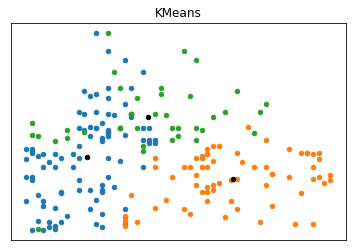

In [ ]:

fig = plt.figure(figsize=(6, 4))

colors = plt.cm.Spectral(np.linspace(0, 1, len(center)))

# Create a plot
ax = fig.add_subplot(1, 1, 1)

u_labels = set(labels)

for k, col in zip(u_labels, colors) :


    my_members = (labels == k)

    cluster_center = center[k]
    

    ax.scatter(X[my_members, 0], X[my_members, 1], s = 20 )
    
    # Plots the centroids with specified color, but with a darker outline
    ax.scatter(cluster_center[0], cluster_center[1], s = 20, color = 'k')

# Title of the plot
ax.set_title('KMeans')

# Remove x-axis ticks
ax.set_xticks(())

# Remove y-axis ticks
ax.set_yticks(())

# Show the plot
plt.show()

# مدل دوم
## سلسه مراتبی

# محاسبه ی ماتریس فاصله

In [ ]:
mtx_X = X.copy()
dist_matrix = euclidean_distances(mtx_X,mtx_X) 


### محاسبه به روش ماتریس فاصله

In [ ]:
z_by_dist_mtrx = AgglomerativeClustering(n_clusters=3, linkage='complete')

z_by_dist_mtrx.fit(dist_matrix)

mtx_labels = z_by_dist_mtrx.labels_

df['cluster_agglo_mtx'] = mtx_labels

ns = z_by_dist_mtrx.n_clusters_


C:\Users\AmirHussain\anaconda3\lib\site-packages\sklearn\cluster\_agglomerative.py:493: ClusterWarning: scipy.cluster: The symmetric non-negative hollow observation matrix looks suspiciously like an uncondensed distance matrix
  out = hierarchy.linkage(X, method=linkage, metric=affinity)


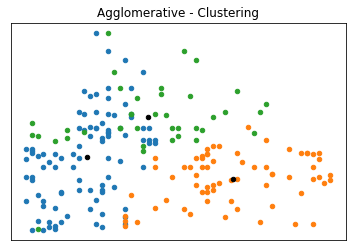

In [ ]:
fig = plt.figure(figsize=(6, 4))
# Create a plot
ax = fig.add_subplot(1, 1, 1)
colors = plt.cm.Spectral(np.linspace(0, 1, len(set(mtx_labels))))

u_labels = set(mtx_labels)

for k, col in zip(u_labels, colors) :


    my_members = (labels == k)

    cluster_center = center[k]
    

    ax.scatter(X[my_members, 0], X[my_members, 1], s = 20 )
    
    # Plots the centroids with specified color, but with a darker outline
    ax.scatter(cluster_center[0], cluster_center[1], s = 20, color = 'k')


# Title of the plot
ax.set_title('Agglomerative - Clustering')

# Remove x-axis ticks
ax.set_xticks(())

# Remove y-axis ticks
ax.set_yticks(())

plt.show() 

## روش DBSCAN
در روش داده های پرت با لیبل 1- مشخص می شود که در آخر می بینیم که همه را پرت در نظر گرفته که یعنی الگورتیم مناسبی نیست

In [ ]:
db_x = X.copy()
# Compute DBSCAN
db = DBSCAN(eps=0.15, min_samples=10, metric='euclidean', algorithm='auto').fit(db_x)

db_labels = db.labels_
df["Clus_Db"]=db_labels
db_labels

array([-1,  0, -1,  0, -1,  0, -1,  0, -1,  0, -1, -1, -1,  0, -1,  0, -1,
        0, -1, -1, -1,  0, -1,  0, -1,  0, -1, -1, -1,  0, -1,  0, -1,  0,
       -1,  0, -1,  0, -1,  0,  1,  0,  1,  2,  1,  0,  1,  2,  2,  2,  1,
        2,  2,  1,  1,  1,  1,  1,  2,  1,  1,  2,  1,  1,  1,  2,  1,  1,
        2,  2,  1,  1,  1,  1,  1,  2,  1,  1,  2,  1,  1,  1,  1,  1,  2,
        1,  1,  2,  2,  1,  1,  2,  1,  1,  2,  2,  1,  2,  1,  2,  2,  1,
        1,  2,  1,  2,  1,  1,  1,  1,  1,  2, -1,  2,  2,  2,  1,  1,  1,
        1,  2, -1, -1,  3,  2,  3,  1,  3, -1,  3, -1,  3,  2,  3, -1,  3,
       -1,  3, -1,  3, -1,  3, -1,  3, -1,  3,  1,  3, -1,  3, -1,  3, -1,
        3, -1,  3, -1,  3, -1,  3, -1,  3, -1,  3, -1,  3, -1,  3, -1,  3,
       -1,  3, -1,  3, -1,  3, -1,  3, -1,  3, -1,  3, -1,  3, -1,  3, -1,
        3, -1,  3, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1], dtype=int64)

IndexError: index 3 is out of bounds for axis 0 with size 3

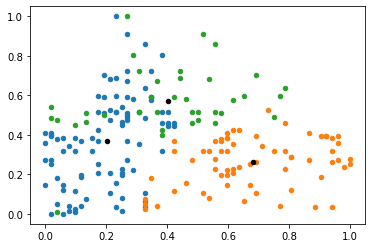

In [ ]:
fig = plt.figure(figsize=(6, 4))
# Create a plot
ax = fig.add_subplot(1, 1, 1)

u_labels = set(db_labels)
colors = plt.cm.Spectral(np.linspace(0, 1, len(u_labels)))



for k, col in zip(u_labels, colors) :


    my_members = (labels == k)

    cluster_center = center[k]
    

    ax.scatter(X[my_members, 0], X[my_members, 1], s = 20 )
    
    # Plots the centroids with specified color, but with a darker outline
    ax.scatter(cluster_center[0], cluster_center[1], s = 20, color = 'k')


# Title of the plot
ax.set_title('DBSCAN')

# Remove x-axis ticks
ax.set_xticks(())

# Remove y-axis ticks
ax.set_yticks(())

plt.show() 

In [ ]:
df.head()

,CustomerID,Gender,Age,Annual Income (k$),Spending Score (1-100),Cluster_KMean,cluster_agglo_mtx,Clus_Db
0,1,Male,19,15,39,0,0,-1
1,2,Male,21,15,81,0,1,0
2,3,Female,20,16,6,2,0,-1
3,4,Female,23,16,77,0,1,0
4,5,Female,31,17,40,0,2,-1


# درنهایت :
###    داده های اولیه هیچ برچسبی ندارشتند بنابراین "تست دقت" قابل انجام نیست (پ.ن : گوگول م سرچ کردم چیزی نیاورد).